# Dataset completo ainda não identificado

In [5]:
import requests

url = "https://olinda.bcb.gov.br/olinda/servico/RDE_Publicacao/versao/v1/odata/TodosRegistros?$format=json&$select=CodigoRDE,NomePessoaNacional,UfPessoaNacional,NomePessoaEstrangeira,PaisPessoaEstrangeira,MoedaOperacao,ValorOperacao,Sistema,Ocorrencia,Modalidade,Ano,Mes"

payload = {}
headers = {
  'Cookie': 'TS01d9825e=012e4f88b3ee304e3069defed450388076577b38d36c12adf31fa5dae29d245097015ea2b0f9d52a72a0fdd60fc0e8d24d72850a90; dtCookie=75614BF838EB9655504A91445F9F5216|X2RlZmF1bHR8MQ; BIGipServer~was_p_as3~was_p~pool_was_443_p=4275048876.47873.0000; JSESSIONID=0000_fuAd6RLGQ9HJMDqBZQuyzk:1cn7m3fq4; TS013694c2=012e4f88b3d9ff69d4e8215038e81a5a90d0b96b2e9353069bae1a949a1f9adfabcc24c74b3bd4cf532399025cd3db710aac7c5e90'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text[:1000])


{"@odata.context":"https://was-p.bcnet.bcb.gov.br/olinda/servico/RDE_Publicacao/versao/v1/odata$metadata#TodosRegistros(CodigoRDE,NomePessoaNacional,UfPessoaNacional,NomePessoaEstrangeira,PaisPessoaEstrangeira,MoedaOperacao,ValorOperacao,Sistema,Ocorrencia,Modalidade,Ano,Mes)","value":[{"CodigoRDE":"TA581490","NomePessoaNacional":"VIA ITALIA COM. E IMP. DE VEICULOS LTDA.","UfPessoaNacional":"SP","NomePessoaEstrangeira":"MIZANO CORP.LLC","PaisPessoaEstrangeira":"ESTADOS UNIDOS","MoedaOperacao":"USD","ValorOperacao":240000.00,"Sistema":"RDE-ROF","Ocorrencia":"REGISTRO CANCELADO","Modalidade":"ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO","Ano":2011,"Mes":11},{"CodigoRDE":"TA581503","NomePessoaNacional":"LIDER TAXI AEREO S/A - AIR BRASIL","UfPessoaNacional":"MG","NomePessoaEstrangeira":"INTERNATIONAL HELICOPTER LEASING BV","PaisPessoaEstrangeira":"PAISES BAIXOS (HOLAN","MoedaOperacao":"USD","ValorOperacao":1702000.00,"Sistema":"RDE-ROF","Ocorrencia":"REGISTRO CANCELADO","Modalidade":"AR

In [10]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, 'lxml')

In [26]:
data = response.json()



In [ ]:
data = [i for i in data['value']]


In [55]:
import pandas as pd
data = pd.read_parquet("FDIcomCNPJ.parquet")
df = pd.DataFrame(data)
df

,CodigoRDE,NomePessoaNacional,UfPessoaNacional,NomePessoaEstrangeira,PaisPessoaEstrangeira,MoedaOperacao,ValorOperacao,Sistema,Ocorrencia,Modalidade,Ano,Mes
0,TA581490,VIA ITALIA COM. E IMP. DE VEICULOS LTDA.,SP,MIZANO CORP.LLC,ESTADOS UNIDOS,USD,240000.0,RDE-ROF,REGISTRO CANCELADO,ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO,2011,11
1,TA581503,LIDER TAXI AEREO S/A - AIR BRASIL,MG,INTERNATIONAL HELICOPTER LEASING BV,PAISES BAIXOS (HOLAN,USD,1702000.0,RDE-ROF,REGISTRO CANCELADO,ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO,2011,11
2,TA581506,LIDER TAXI AEREO S/A - AIR BRASIL,MG,INTERNATIONAL HELICOPTER LEASING BV,PAISES BAIXOS (HOLAN,USD,296000.0,RDE-ROF,REGISTRO CANCELADO,ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO,2011,11
3,TA581621,PANALPINA LTDA.,SP,SUDLEASING GMBH,ALEMANHA,EUR,1.0,RDE-ROF,REGISTRO CANCELADO,ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO,2011,11
4,TA581710,SELZER AUTOMOTIVA DO BRASIL LTDA.,SP,SELZER FERTIGUNGSTECHNIK GMBH & CO KG,ALEMANHA,EUR,397494.0,RDE-ROF,REGISTRO CANCELADO,ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO,2011,11
...,...,...,...,...,...,...,...,...,...,...,...,...
307114,IA113891,WINTERSHALL DEA DO BRASIL SERVICOS LTDA.,RJ,WINTERSHALL VERMOGENSVERWALTUNGSGESELLSCHAFT MBH,Alemanha,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12
307115,IA291532,BITFY INTERMEDIACOES E SERVICOS DE PAGAMENTOS ...,SP,BITFY HOLDINGS LTD,Ilhas Virgens Britânicas,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12
307116,IA269784,ACE ENGENHARIA E CONSTRUCOES LTDA,SP,INTERIOR SERVICES GROUP (UK HOLDINGS) LIMITED,Reino Unido,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12
307117,IA043870,AUTOIMOVEIS EMPREENDIMENTOS E PARTICIPACOES LTDA.,SP,AUTOMOTIVE INV.LLC,Estados Unidos,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12


In [65]:
df.columns

Index(['CodigoRDE', 'NomePessoaNacional', 'UfPessoaNacional',
       'NomePessoaEstrangeira', 'PaisPessoaEstrangeira', 'MoedaOperacao',
       'ValorOperacao', 'Sistema', 'Ocorrencia', 'Modalidade', 'Ano', 'Mes'],
      dtype='object')

In [56]:
#date = 03-04-2024
currencies = [{'currency': 'USD', 'exrate/R$': '5,08'},
 {'currency': 'EUR', 'exrate/R$': '5,48'},
 {'currency': 'BRL', 'exrate/R$': '1'},
 {'currency': 'CHF', 'exrate/R$': '5,59'},
 {'currency': 'JPY', 'exrate/R$': '0,033'},
 {'currency': 'CAD', 'exrate/R$': '3,74'},
 {'currency': 'XAU', 'exrate/R$': '11.528'},
 {'currency': 'GBP', 'exrate/R$': '6,385'},
 {'currency': 'NOK', 'exrate/R$': '0,46'},
 {'currency': 'AUD', 'exrate/R$': '3,308'},
 {'currency': 'SEK', 'exrate/R$': '0,47'},
 {'currency': 'DKK', 'exrate/R$': '0,73'},
 {'currency': 'FJD', 'exrate/R$': '2,24'},
 {'currency': 'DEM', 'exrate/R$': '5,47'},
 {'currency': 'ZAR', 'exrate/R$': '0,27'},
 {'currency': 'KRW', 'exrate/R$': '0,0037'},
 {'currency': 'SDR', 'exrate/R$': '6,71'},
 {'currency': 'CNY', 'exrate/R$': '0,70'},
 {'currency': 'CLP', 'exrate/R$': '0,005'},
 {'currency': 'AFN', 'exrate/R$': '0,071'},
 {'currency': 'KWD', 'exrate/R$': '16,49'},
 {'currency': 'MXN', 'exrate/R$': '0,306'},
 {'currency': 'WST', 'exrate/R$': '1,83'},
 {'currency': 'NZD', 'exrate/R$': '3,02'},
 {'currency': 'COP', 'exrate/R$': '0,0013'},
 {'currency': 'XEU', 'exrate/R$': '5,47'},
 {'currency': 'THB', 'exrate/R$': '0,13'},
 {'currency': 'ARS', 'exrate/R$': '0,005'},
 {'currency': 'UYU', 'exrate/R$': '0,134'},
 {'currency': 'INR', 'exrate/R$': '0,06'},
 {'currency': 'CLF', 'exrate/R$': '193,65'},
 {'currency': 'SGD', 'exrate/R$': '3,75'},
 {'currency': 'SSP', 'exrate/R$': '25,709'}]


In [67]:
exchange_rates = pd.DataFrame(currencies)

exchange_rates['exrate/R$'] = exchange_rates['exrate/R$'].str.replace(',', '.').astype(float)

df_merged = pd.merge(df, exchange_rates, left_on='MoedaOperacao', right_on='currency', how='left')
df_merged['ValorOperacao_em_real'] = df_merged['ValorOperacao'] * df_merged['exrate/R$']
df_merged['data_exrate'] = '03-04-2024'
df_merged


,CodigoRDE,NomePessoaNacional,UfPessoaNacional,NomePessoaEstrangeira,PaisPessoaEstrangeira,MoedaOperacao,ValorOperacao,Sistema,Ocorrencia,Modalidade,Ano,Mes,currency,exrate/R$,ValorOperacao_em_real,data_exrate
0,TA581490,VIA ITALIA COM. E IMP. DE VEICULOS LTDA.,SP,MIZANO CORP.LLC,ESTADOS UNIDOS,USD,240000.0,RDE-ROF,REGISTRO CANCELADO,ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO,2011,11,USD,5.08,1219200.00,03-04-2024
1,TA581503,LIDER TAXI AEREO S/A - AIR BRASIL,MG,INTERNATIONAL HELICOPTER LEASING BV,PAISES BAIXOS (HOLAN,USD,1702000.0,RDE-ROF,REGISTRO CANCELADO,ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO,2011,11,USD,5.08,8646160.00,03-04-2024
2,TA581506,LIDER TAXI AEREO S/A - AIR BRASIL,MG,INTERNATIONAL HELICOPTER LEASING BV,PAISES BAIXOS (HOLAN,USD,296000.0,RDE-ROF,REGISTRO CANCELADO,ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO,2011,11,USD,5.08,1503680.00,03-04-2024
3,TA581621,PANALPINA LTDA.,SP,SUDLEASING GMBH,ALEMANHA,EUR,1.0,RDE-ROF,REGISTRO CANCELADO,ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO,2011,11,EUR,5.48,5.48,03-04-2024
4,TA581710,SELZER AUTOMOTIVA DO BRASIL LTDA.,SP,SELZER FERTIGUNGSTECHNIK GMBH & CO KG,ALEMANHA,EUR,397494.0,RDE-ROF,REGISTRO CANCELADO,ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO,2011,11,EUR,5.48,2178267.12,03-04-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307114,IA113891,WINTERSHALL DEA DO BRASIL SERVICOS LTDA.,RJ,WINTERSHALL VERMOGENSVERWALTUNGSGESELLSCHAFT MBH,Alemanha,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12,NaN,NaN,NaN,03-04-2024
307115,IA291532,BITFY INTERMEDIACOES E SERVICOS DE PAGAMENTOS ...,SP,BITFY HOLDINGS LTD,Ilhas Virgens Britânicas,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12,NaN,NaN,NaN,03-04-2024
307116,IA269784,ACE ENGENHARIA E CONSTRUCOES LTDA,SP,INTERIOR SERVICES GROUP (UK HOLDINGS) LIMITED,Reino Unido,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12,NaN,NaN,NaN,03-04-2024
307117,IA043870,AUTOIMOVEIS EMPREENDIMENTOS E PARTICIPACOES LTDA.,SP,AUTOMOTIVE INV.LLC,Estados Unidos,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12,NaN,NaN,NaN,03-04-2024


In [86]:
df_merged[df_merged['NomePessoaNacional'].str.contains('TOLEDO DO BRASIL INDUSTRIA DE BALANCAS LTDA')]

,CodigoRDE,NomePessoaNacional,UfPessoaNacional,NomePessoaEstrangeira,PaisPessoaEstrangeira,MoedaOperacao,ValorOperacao,Sistema,Ocorrencia,Modalidade,Ano,Mes,currency,exrate/R$,ValorOperacao_em_real,data_exrate
175768,IA088186,TOLEDO DO BRASIL INDUSTRIA DE BALANCAS LTDA,SP,CHRISTINA BEATRICE SIMONIUS,Suíça,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2017,12,NaN,NaN,NaN,03-04-2024
233907,TB036572,TOLEDO DO BRASIL INDUSTRIA DE BALANCAS LTDA,SP,IMULKAR SA,Uruguai,BRL,342450.0,RDE-ROF,REGISTRO CONCLUIDO,EMPRESTIMOS,2019,12,BRL,1.0,342450.0,03-04-2024
233908,TB036575,TOLEDO DO BRASIL INDUSTRIA DE BALANCAS LTDA,SP,MAYA ADELINA HAEGLER,Reino Unido,BRL,342450.0,RDE-ROF,REGISTRO CONCLUIDO,EMPRESTIMOS,2019,12,BRL,1.0,342450.0,03-04-2024


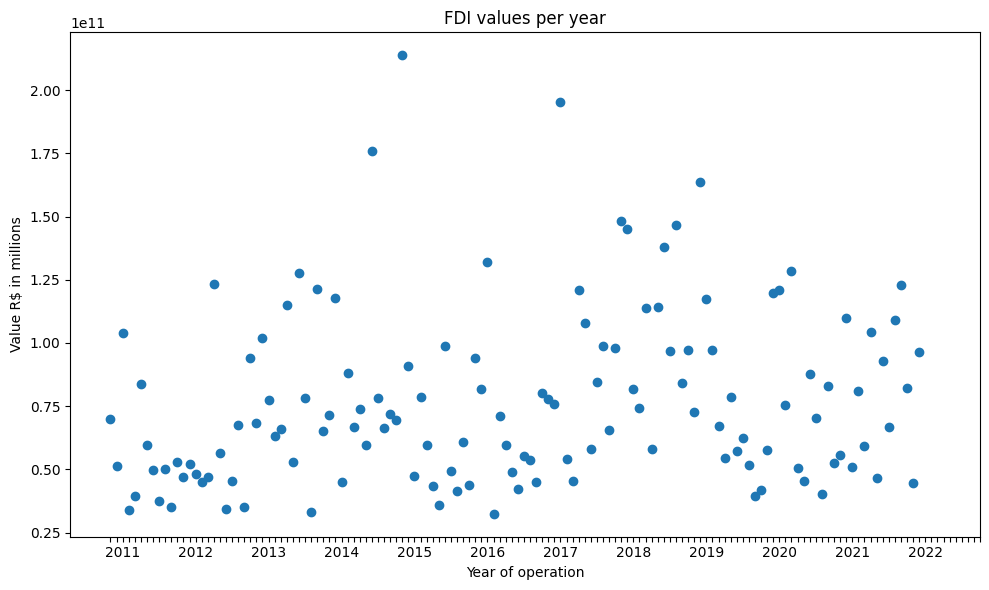

In [68]:
import matplotlib.pyplot as plt

operacao_mesano = df_merged.groupby(['Ano','Mes'])['ValorOperacao_em_real'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(operacao_mesano['Ano'].astype(str) + '/' + operacao_mesano['Mes'].astype(str), operacao_mesano['ValorOperacao_em_real'],
         marker='o', linestyle='None')
plt.xlabel('Year of operation')
plt.ylabel('Value R$ in millions')
plt.title('FDI values per year')

anos = operacao_mesano['Ano'].unique()
meses = operacao_mesano['Mes'].unique()

plt.xticks(range(len(anos)* len(meses)), [str(ano) if mes == 1 else '' for ano in anos for mes in meses])

plt.grid(False)
plt.tight_layout()
plt.show()



In [77]:
df.to_parquet('FDIcomvalores.parquet')

In [56]:
df.sort_values('ValorOperacao', ascending=False)

,CodigoRDE,NomePessoaNacional,UfPessoaNacional,NomePessoaEstrangeira,PaisPessoaEstrangeira,MoedaOperacao,ValorOperacao,Sistema,Ocorrencia,Modalidade,Ano,Mes
246534,TB050760,SHAULA EMPREENDIMENTOS E PARTICIPACOES LTDA.,SP,NONGHYUP BANK,Coréia do Sul,KRW,1.810000e+11,RDE-ROF,REGISTRO CONCLUIDO,EMPRESTIMOS,2020,6
30815,TA619469,SHAULA EMPRS. E PARTS. LTDA.,SP,NONGHYUP BANK,"COREIA (DO SUL), REP",KRW,1.810000e+11,RDE-ROF,REGISTRO CONCLUIDO,EMPRESTIMOS,2012,12
301777,TB119150,COSAN OITO S.A.,SP,CITIBANK N.A.,Reino Unido,JPY,9.529845e+10,RDE-ROF,REGISTRO CONCLUIDO,EMPRESTIMOS,2022,10
133914,TA767372,UNITED MEDICAL LTDA,SP,BIOTOSCANA FARMA S.A.,COLOMBIA,COP,8.633474e+10,RDE-ROF,REGISTRO CONCLUIDO,EMPRESTIMOS,2016,6
31205,TA636728,BANCO PINE S. A.,SP,BANCO DE CHILE,CHILE,CLP,3.437766e+10,RDE-ROF,REGISTRO CONCLUIDO,EMPRESTIMOS,2012,12
...,...,...,...,...,...,...,...,...,...,...,...,...
307114,IA113891,WINTERSHALL DEA DO BRASIL SERVICOS LTDA.,RJ,WINTERSHALL VERMOGENSVERWALTUNGSGESELLSCHAFT MBH,Alemanha,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12
307115,IA291532,BITFY INTERMEDIACOES E SERVICOS DE PAGAMENTOS ...,SP,BITFY HOLDINGS LTD,Ilhas Virgens Britânicas,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12
307116,IA269784,ACE ENGENHARIA E CONSTRUCOES LTDA,SP,INTERIOR SERVICES GROUP (UK HOLDINGS) LIMITED,Reino Unido,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12
307117,IA043870,AUTOIMOVEIS EMPREENDIMENTOS E PARTICIPACOES LTDA.,SP,AUTOMOTIVE INV.LLC,Estados Unidos,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12


# Identificando fazendo merge com a base identificada

In [78]:
import requests

url = "https://olinda.bcb.gov.br/olinda/servico/RDE_Publicacao/versao/v1/odata/RegistrosIED?$format=json&$select=CodigoRDE,CnpjBaseReceptora,NomePessoaNacional,UfPessoaNacional,NomePessoaEstrangeira,PaisPessoaEstrangeira,Sistema,Ocorrencia,Modalidade,Ano,Mes"

payload = {}
headers = {}

response1 = requests.request("GET", url, headers=headers, data=payload)


print(response1.text[:1000])


{"@odata.context":"https://was-p.bcnet.bcb.gov.br/olinda/servico/RDE_Publicacao/versao/v1/odata$metadata#RegistrosIED(CodigoRDE,CnpjBaseReceptora,NomePessoaNacional,UfPessoaNacional,NomePessoaEstrangeira,PaisPessoaEstrangeira,Sistema,Ocorrencia,Modalidade,Ano,Mes)","value":[{"CodigoRDE":"IA001103","CnpjBaseReceptora":"46546669","NomePessoaNacional":"INTERSERVICE PUBLICIDADE S. LTDA.","UfPessoaNacional":"SP","NomePessoaEstrangeira":"THE INTERPUBLIC GROUP OF COMPANIES, INC","PaisPessoaEstrangeira":"ESTADOS UNIDOS","Sistema":"RDE-IED","Ocorrencia":"REGISTRO EFETUADO","Modalidade":"INVESTIMENTO ESTRANGEIRO DIRETO","Ano":2011,"Mes":11},{"CodigoRDE":"IA001694","CnpjBaseReceptora":"59704510","NomePessoaNacional":"TOLEDO DO BRASIL IND. DE BALANCAS LTDA","UfPessoaNacional":"SP","NomePessoaEstrangeira":"RELIANCE ELECTRIC INTL.FINANCE CO.","PaisPessoaEstrangeira":"ESTADOS UNIDOS","Sistema":"RDE-IED","Ocorrencia":"REGISTRO EFETUADO","Modalidade":"INVESTIMENTO ESTRANGEIRO DIRETO","Ano":2011,"Mes":1

In [79]:
iddatta = response1.json()

In [80]:
iddatta = [i for i in iddatta['value']]

In [81]:
id = pd.DataFrame(iddatta)
id

,CodigoRDE,CnpjBaseReceptora,NomePessoaNacional,UfPessoaNacional,NomePessoaEstrangeira,PaisPessoaEstrangeira,Sistema,Ocorrencia,Modalidade,Ano,Mes
0,IA001103,46546669,INTERSERVICE PUBLICIDADE S. LTDA.,SP,"THE INTERPUBLIC GROUP OF COMPANIES, INC",ESTADOS UNIDOS,RDE-IED,REGISTRO EFETUADO,INVESTIMENTO ESTRANGEIRO DIRETO,2011,11
1,IA001694,59704510,TOLEDO DO BRASIL IND. DE BALANCAS LTDA,SP,RELIANCE ELECTRIC INTL.FINANCE CO.,ESTADOS UNIDOS,RDE-IED,REGISTRO EFETUADO,INVESTIMENTO ESTRANGEIRO DIRETO,2011,11
2,IA003544,63066138,CBI AGROPECUARIA LTDA,SP,KRISOMED S.A.,PANAMA,RDE-IED,REGISTRO EFETUADO,INVESTIMENTO ESTRANGEIRO DIRETO,2011,11
3,IA004615,42168526,EQUIPS. CIENTIFICOS INSTRON LTDA.,SP,INSTRON CORP.,ESTADOS UNIDOS,RDE-IED,REGISTRO EFETUADO,INVESTIMENTO ESTRANGEIRO DIRETO,2011,11
4,IA005760,63066138,CBI AGROPECUARIA LTDA,SP,CARINEX S.A.,SUICA,RDE-IED,REGISTRO EFETUADO,INVESTIMENTO ESTRANGEIRO DIRETO,2011,11
...,...,...,...,...,...,...,...,...,...,...,...
72561,IA113891,04272545,WINTERSHALL DEA DO BRASIL SERVICOS LTDA.,RJ,WINTERSHALL VERMOGENSVERWALTUNGSGESELLSCHAFT MBH,Alemanha,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12
72562,IA291532,31255976,BITFY INTERMEDIACOES E SERVICOS DE PAGAMENTOS ...,SP,BITFY HOLDINGS LTD,Ilhas Virgens Britânicas,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12
72563,IA269784,01085136,ACE ENGENHARIA E CONSTRUCOES LTDA,SP,INTERIOR SERVICES GROUP (UK HOLDINGS) LIMITED,Reino Unido,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12
72564,IA043870,05439782,AUTOIMOVEIS EMPREENDIMENTOS E PARTICIPACOES LTDA.,SP,AUTOMOTIVE INV.LLC,Estados Unidos,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12


In [82]:
id.to_parquet('FDIcomCNPJ.parquet')

In [83]:
pd.read_parquet('FDIcomCNPJ.parquet')

,CodigoRDE,CnpjBaseReceptora,NomePessoaNacional,UfPessoaNacional,NomePessoaEstrangeira,PaisPessoaEstrangeira,Sistema,Ocorrencia,Modalidade,Ano,Mes
0,IA001103,46546669,INTERSERVICE PUBLICIDADE S. LTDA.,SP,"THE INTERPUBLIC GROUP OF COMPANIES, INC",ESTADOS UNIDOS,RDE-IED,REGISTRO EFETUADO,INVESTIMENTO ESTRANGEIRO DIRETO,2011,11
1,IA001694,59704510,TOLEDO DO BRASIL IND. DE BALANCAS LTDA,SP,RELIANCE ELECTRIC INTL.FINANCE CO.,ESTADOS UNIDOS,RDE-IED,REGISTRO EFETUADO,INVESTIMENTO ESTRANGEIRO DIRETO,2011,11
2,IA003544,63066138,CBI AGROPECUARIA LTDA,SP,KRISOMED S.A.,PANAMA,RDE-IED,REGISTRO EFETUADO,INVESTIMENTO ESTRANGEIRO DIRETO,2011,11
3,IA004615,42168526,EQUIPS. CIENTIFICOS INSTRON LTDA.,SP,INSTRON CORP.,ESTADOS UNIDOS,RDE-IED,REGISTRO EFETUADO,INVESTIMENTO ESTRANGEIRO DIRETO,2011,11
4,IA005760,63066138,CBI AGROPECUARIA LTDA,SP,CARINEX S.A.,SUICA,RDE-IED,REGISTRO EFETUADO,INVESTIMENTO ESTRANGEIRO DIRETO,2011,11
...,...,...,...,...,...,...,...,...,...,...,...
72561,IA113891,04272545,WINTERSHALL DEA DO BRASIL SERVICOS LTDA.,RJ,WINTERSHALL VERMOGENSVERWALTUNGSGESELLSCHAFT MBH,Alemanha,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12
72562,IA291532,31255976,BITFY INTERMEDIACOES E SERVICOS DE PAGAMENTOS ...,SP,BITFY HOLDINGS LTD,Ilhas Virgens Britânicas,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12
72563,IA269784,01085136,ACE ENGENHARIA E CONSTRUCOES LTDA,SP,INTERIOR SERVICES GROUP (UK HOLDINGS) LIMITED,Reino Unido,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12
72564,IA043870,05439782,AUTOIMOVEIS EMPREENDIMENTOS E PARTICIPACOES LTDA.,SP,AUTOMOTIVE INV.LLC,Estados Unidos,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12


In [60]:
id.columns

Index(['CodigoRDE', 'CnpjBaseReceptora', 'NomePessoaNacional',
       'UfPessoaNacional', 'NomePessoaEstrangeira', 'PaisPessoaEstrangeira',
       'Sistema', 'Ocorrencia', 'Modalidade', 'Ano', 'Mes'],
      dtype='object')

In [61]:
merged_df = pd.merge(df, id[['CodigoRDE', 'CnpjBaseReceptora']], on='CodigoRDE', how='left')

In [74]:
merged_df[merged_df['ValorOperacao'].notna() & merged_df['CnpjBaseReceptora'].notna()]


,CodigoRDE,NomePessoaNacional,UfPessoaNacional,NomePessoaEstrangeira,PaisPessoaEstrangeira,MoedaOperacao,ValorOperacao,Sistema,Ocorrencia,Modalidade,Ano,Mes,CnpjBaseReceptora


In [75]:
merged_df

,CodigoRDE,NomePessoaNacional,UfPessoaNacional,NomePessoaEstrangeira,PaisPessoaEstrangeira,MoedaOperacao,ValorOperacao,Sistema,Ocorrencia,Modalidade,Ano,Mes,CnpjBaseReceptora
0,TA581490,VIA ITALIA COM. E IMP. DE VEICULOS LTDA.,SP,MIZANO CORP.LLC,ESTADOS UNIDOS,USD,240000.0,RDE-ROF,REGISTRO CANCELADO,ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO,2011,11,NaN
1,TA581503,LIDER TAXI AEREO S/A - AIR BRASIL,MG,INTERNATIONAL HELICOPTER LEASING BV,PAISES BAIXOS (HOLAN,USD,1702000.0,RDE-ROF,REGISTRO CANCELADO,ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO,2011,11,NaN
2,TA581506,LIDER TAXI AEREO S/A - AIR BRASIL,MG,INTERNATIONAL HELICOPTER LEASING BV,PAISES BAIXOS (HOLAN,USD,296000.0,RDE-ROF,REGISTRO CANCELADO,ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO,2011,11,NaN
3,TA581621,PANALPINA LTDA.,SP,SUDLEASING GMBH,ALEMANHA,EUR,1.0,RDE-ROF,REGISTRO CANCELADO,ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO,2011,11,NaN
4,TA581710,SELZER AUTOMOTIVA DO BRASIL LTDA.,SP,SELZER FERTIGUNGSTECHNIK GMBH & CO KG,ALEMANHA,EUR,397494.0,RDE-ROF,REGISTRO CANCELADO,ARRENDAMENTO MERCANTIL / ALUGUEL / AFRETAMENTO,2011,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334278,IA269784,ACE ENGENHARIA E CONSTRUCOES LTDA,SP,INTERIOR SERVICES GROUP (UK HOLDINGS) LIMITED,Reino Unido,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12,01085136
334279,IA269784,ACE ENGENHARIA E CONSTRUCOES LTDA,SP,INTERIOR SERVICES GROUP (UK HOLDINGS) LIMITED,Reino Unido,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12,01085136
334280,IA043870,AUTOIMOVEIS EMPREENDIMENTOS E PARTICIPACOES LTDA.,SP,AUTOMOTIVE INV.LLC,Estados Unidos,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12,05439782
334281,IA113822,LUBRIZOL DO BRASIL ADITIVOS LTDA,RJ,LUBRIZOL HOLDINGS NETHERLANDS B.V.,Países Baixos,,NaN,RDE-IED,REGISTRO ENCERRADO,INVESTIMENTO ESTRANGEIRO DIRETO,2022,12,42593962
